In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import fmin

In [3]:
data = np.loadtxt('full_ogtt.txt')

In [4]:
# Old equation
def Za_Old(Z,t,a,b,s,r,m):
    
    Gi, Gs, I = Z
    
    Gs_base = 100

    res = [
        -Gi*a ,        
        Gi*a - (s*I*Gs + b*max(0, Gs-Gs_base)),
        r*Gs - m*I
    ]
    return res

In [5]:
# New equation
def Za(Z,t,k,b,s,r,m):
    
    Gi, Gs, I, U = Z
    
    Gs_base = 150

    res = [
        -Gi*U ,        
        Gi*U - (s*I*Gs + b*max(0, Gs-Gs_base)),
        r*Gs - m*I,
        -k*U
    ]
    return res

In [6]:
# Optimization

def sse(param) :

    k,b,s,r,m = param
    y0 = [G0,Gs_ini,I_ini,U0]    
    y = odeint(Za,y0,data[:,0], args = (k,b,s,r,m))

    return np.sum((y[:,1]-data[:,-1])**2) + (k<0)*1e8 + (b<0)*1e8 + (s<0)*1e8 +(r<0)*1e8 +(m<0)*1e8


G0, U0, Gs_ini, I_ini = 4500, 0.04, 100, 10

minimum = fmin(sse, [ 0.01, 0.001, 0.1, 0.001, 0.1])
print(minimum)

[1.62081705e-02 9.94752179e-02 1.03364289e-01 3.56849959e-05
 1.20465835e-01]


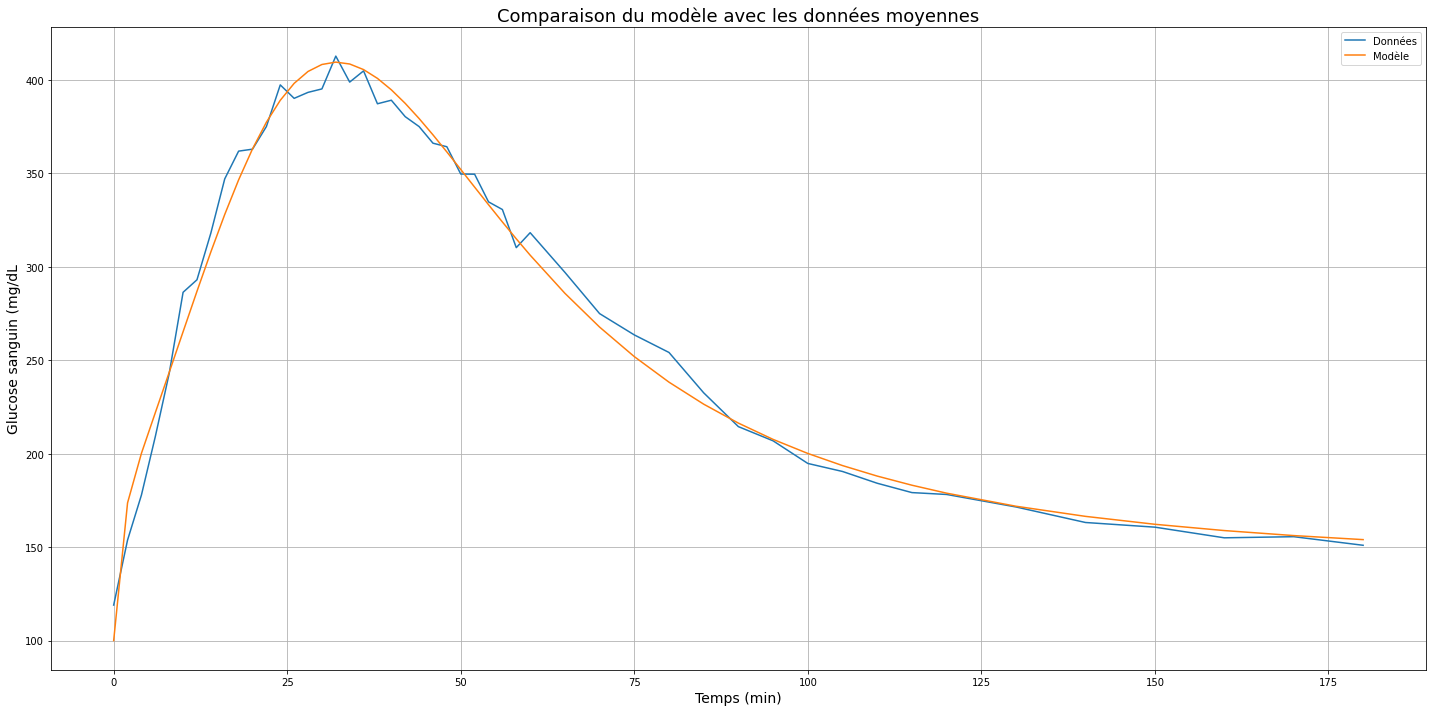

In [7]:
# Test
plt.rcParams["figure.figsize"] = [20, 10]

def Za1(Z,t):

    Gi, Gs, I, U = Z

    Gs_base = 150

    res = [
        -Gi*U ,        
        Gi*U - (s*I*Gs + b*max(0, Gs-Gs_base)),
        r*Gs - m*I,
        -k*U
    ]

    return res

k,b,s,r,m = list(minimum)
y0 = [ G0, Gs_ini, I_ini, U0]
y = odeint(Za1,y0,data[:,0])

plt.plot(data[:,0],data[:,-1],label="Datas")
plt.plot(data[:,0],y[:,1],label="Model")
plt.legend()
plt.grid()
plt.title("Comparison of the model with average data",fontsize = 18)
plt.xlabel('Time (min)',fontsize = 14)
plt.ylabel('Blood Glucose (mg/dL',fontsize = 14)

plt.tight_layout()

plt.show()

#### Have they absorbed everything? ####

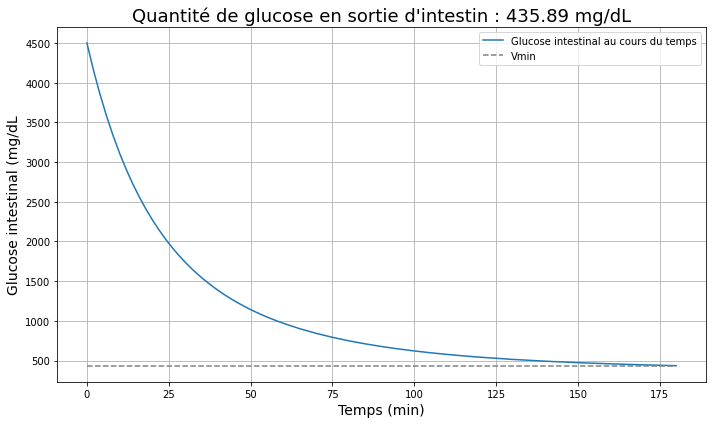

In [12]:

plt.rcParams["figure.figsize"] = [10, 6]

plt.plot(data[:,0],y[:,0],label = 'Intestinal glucose over time')
plt.plot(data[:,0],np.ones(len(data[:,0]),)*np.min(y[:,0]),color='gray',linestyle='--',label = 'Vmin')
plt.grid()
plt.legend()
plt.title(f"Quantity of glucose at the exit of the intestine : {round(np.min(y[:,0]),2)} mg/dL",fontsize = 18)
plt.xlabel('Time (min)',fontsize = 14)
plt.ylabel('Intestinal Glucose (mg/dL',fontsize = 14)

plt.tight_layout()

plt.show()

#### There are still 435 out of 4500 or 9.7%. <br>
#### There is thus an absorption of approximately 90% of the intestinal glucose. <br>
#### This fit better to the experimental curve